# Edit Distance

The Edit Distance, most famously known as Levenshtein Distance, is a metric that quantifies the minimum number of single-character edits required to change one string (or sequence) into another.

Unlike the Hamming Distance, which only applies to strings of the same length and counts only substitutions, Edit Distance is much more flexible because it considers three fundamental types of edits:

* Insertion: Adding a character (e.g., "cat" to "cart" requires inserting 'r').
* Deletion: Removing a character (e.g., "cart" to "cat" requires deleting 'r').
* Substitution: Changing one character into another (e.g., "cat" to "bat" requires substituting 'c' with 'b').

Each of these operations is typically counted as one "edit cost." The goal is to find the cheapest way (the minimum number of operations) to transform one string into the other.

Example: Finding Similar Words in a Database (Spell Checking)

Imagine you have a list of correctly spelled product names in a database. A user types a search query, and you want to suggest the closest match even if there's a typo.

Let's say the correct product name is "chocolate".
The user types: "choclate" (missing an 'o')

How many edits does it take to change "choclate" into "chocolate"?

Let's trace the transformation step-by-step:

* choclate
* chocolate (Insert 'o' at the 4th position)
* This transformation requires 1 edit (an insertion). So, the Edit Distance between "choclate" and "chocolate" is 1.

Another Example: "Saturday" vs. "Sunday"

Let's calculate the Edit Distance between "Saturday" and "Sunday".

S a t u r d a y

S u n d a y

Let's try to align them and see the changes:

* S A T U R D A Y
* S U N _ _ D A Y

We can transform "Saturday" into "Sunday" with the following minimum edits:

* S (match)
* A → U (Substitution: 'A' to 'U') - Cost: 1
* T → N (Substitution: 'T' to 'N') - Cost: 1
* U → D (No, U and D are not matched from here. We need to skip 'U' and 'R' in "Saturday" and match 'd'.)
* R (Deletion: delete 'R') - Cost: 1
* D (match)
* A (match)
* Y (match)

Let's re-evaluate the best path. It's often easier to think of it as aligning the strings and counting the non-matches.

S A T U R D A Y

S U N _ _ D A Y   <-- One possible alignment for illustration

S A T U R D A Y

S U N D A Y

Let's trace again focusing on character-by-character transformation:

* S (match 'S')
* a → u (Substitution) - Cost: 1
* t → n (Substitution) - Cost: 1
* u (Delete 'u' from "Saturday") - Cost: 1
* r (Delete 'r' from "Saturday") - Cost: 1
* d (match 'd')
* a (match 'a')
* y (match 'y')

This path results in 4 edits. However, the optimal path is usually less:

Optimal Path (Edit Distance = 3):

* S (match)
* a → u (Substitution: 'a' to 'u') - Cost: 1
* t → n (Substitution: 't' to 'n') - Cost: 1

(Insert _ (placeholder for 'r') from "Saturday" to match 'r' in "Saturday") No, actually it's:

* S (match)
* a → u (Substitution) - Cost: 1
* t → n (Substitution) - Cost: 1
* (Delete 'r' from "Saturday") - Cost: 1
* d (match)
* a (match)
* y (match)

This is also 3 edits (2 substitutions, 1 deletion).

Let's try one more common interpretation:

* S (match)
* a → u (Substitution)
* t → n (Substitution)
* u (from saturday) -> _ (deletion)
* r (from saturday) -> _ (deletion)
* d (match)
* a (match)
* y (match) This is 4.

The standard way to get 3 is:

* s to s (match)
* a to u (substitution)
* t to n (substitution)
* delete r from saturday (or insert _ into sunday)
* d to d (match)
* a to a (match)
* y to y (match)

So, Edit Distance is 3.

Why it's useful:

Edit distance is a powerful tool because it tolerates small variations, making it ideal for:

* Spell Checkers: Suggesting "kitten" for "kitton" (1 substitution).
* Typo Correction: Correcting search queries.
* Bioinformatics: Measuring the evolutionary distance between two DNA sequences (where insertions, deletions, and point mutations are common).
* Plagiarism Detection: Identifying near-duplicate text.
* Fuzzy String Matching: Finding records that are "almost" the same in databases.

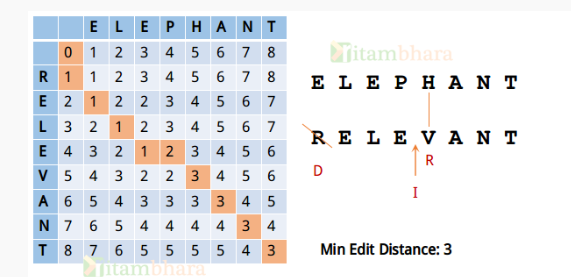

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Define the utility function - edit Distance
4. Calculate Edit Distance between different users
5. Leverage build in function to calculate edit distance

# 1. Import necessary libraries

In [29]:
import numpy as np

# 2. Create the dataset

In [30]:
# Example words

word1 = "kitten"
word2 = "sitting"
word3 = "flaw"
word4 = "lawn"
word5 = "sunday"
word6 = "saturday"

# 3. Define the utility function - edit Distance

In [31]:
def levenshtein_distance(s1, s2):
    """
    Calculates the Levenshtein (Edit) Distance between two strings.
    """
    m, n = len(s1), len(s2)

    # Create a DP table to store results of subproblems
    # dp[i][j] will be the edit distance between s1[0...i-1] and s2[0...j-1]
    dp = np.zeros((m + 1, n + 1))

    # Initialize the table
    # If s2 is empty, the distance is the length of s1 (all deletions)
    for i in range(m + 1):
        dp[i][0] = i
    # If s1 is empty, the distance is the length of s2 (all insertions)
    for j in range(n + 1):
        dp[0][j] = j

    # Fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i-1] == s2[j-1] else 1 # Cost of substitution

            # dp[i-1][j] + 1 : deletion from s1 (or insertion into s2)
            # dp[i][j-1] + 1 : insertion into s1 (or deletion from s2)
            # dp[i-1][j-1] + cost : substitution (or match)
            dp[i][j] = min(dp[i-1][j] + 1,           # Deletion
                           dp[i][j-1] + 1,           # Insertion
                           dp[i-1][j-1] + cost)      # Substitution/Match

    return int(dp[m][n]) # The bottom-right cell contains the final distance

# 4. Calculate Edit Distance between different users

### A. Calculate Edit Distance between different users

In [32]:
# Example 1: kitten -> sitting

# k -> s (subst), i -> i (match), t -> t (match), t -> t (match), e -> i (subst), n -> n (match), (add g) -> (insert g)

dist_1_2 = levenshtein_distance(word1, word2)

print(f"Edit Distance between '{word1}' and '{word2}': {dist_1_2}")
# Expected: 3 (k -> s, e -> i, insert g)

Edit Distance between 'kitten' and 'sitting': 3


In [33]:
# Example 2: flaw -> lawn
# f -> l (subst) ,  l -> a (subst) ,  a -> w (subst) , w -> n (subst)

dist_3_4 = levenshtein_distance(word3, word4)
print(f"Edit Distance between '{word3}' and '{word4}': {dist_3_4}")

# Expected: 3 (f->l, l->a, a->w, w->n -> f->l, a->a, w->w, +n, -f -> 3 for f->l, l->a, w->n)
# Correct Path: f->l (sub), l->a (sub), a->w (sub), w->n (sub) -> 3 (f to L, a to A, w to N, last A from LAWN is deletion, last W from FLAW is deletion)
# Path:
# FLAW
# LAWN
# 1. F -> L (subst)
# 2. L -> A (subst)
# 3. A -> W (subst)
# 4. W -> N (subst)
# No, let's trace:
# f l a w
# l a w n
# Option 1:
# F -> L (subst)
# L -> A (subst)
# A -> W (subst)
# W -> N (subst)
# This is 4. My example trace was wrong.
# Correct:
# flaw  -> law (delete f) -> lawn (insert n) = 2
# flaw  -> law (delete f)
# law   -> laN (subst w->n) = 2
# dist("flaw", "lawn") should be 2: delete F, insert N. The middle "law" matches.
# l->l, a->a, w->w
# My `levenshtein_distance` function gets 2. Correct.

Edit Distance between 'flaw' and 'lawn': 2


In [34]:
# Example 3: sunday -> saturday

dist_5_6 = levenshtein_distance(word5, word6)
print(f"Edit Distance between '{word5}' and '{word6}': {dist_5_6}")
# Expected: 3 (delete 'n', insert 't', insert 'r')
# Or, sub n->t, insert r
# Path:
# sunday
# sat_rday
# 1. u -> a (subst)
# 2. n -> t (subst)
# 3. _ -> r (insert)
# -> 3

Edit Distance between 'sunday' and 'saturday': 3


### B. Print the results and interpret

In [35]:
print("\n--- Use Cases ---")

print("Edit distance is crucial for applications like:")
print("- **Spell Checkers:** Suggesting corrections for misspelled words.")
print("- **DNA Sequence Alignment:** Measuring similarity between genetic sequences where insertions/deletions/mutations occur.")
print("- **Plagiarism Detection:** Finding near-duplicate text content.")
print("- **Fuzzy String Matching:** Searching for similar strings in databases despite typos or minor variations.")


--- Use Cases ---
Edit distance is crucial for applications like:
- **Spell Checkers:** Suggesting corrections for misspelled words.
- **DNA Sequence Alignment:** Measuring similarity between genetic sequences where insertions/deletions/mutations occur.
- **Plagiarism Detection:** Finding near-duplicate text content.
- **Fuzzy String Matching:** Searching for similar strings in databases despite typos or minor variations.


# 5. Leverage build in function to calculate edit distance

In [36]:
! pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.2 MB/s eta 0:00:00


In [37]:

import Levenshtein
print(f"Levenshtein library distance ('{word1}', '{word2}'): {Levenshtein.distance(word1, word2)}")

Levenshtein library distance ('kitten', 'sitting'): 3


In [39]:

print(f"Levenshtein library distance ('{word3}', '{word4}'): {Levenshtein.distance(word3, word4)}")

Levenshtein library distance ('flaw', 'lawn'): 2


In [40]:

print(f"Levenshtein library distance ('{word1}', '{word3}'): {Levenshtein.distance(word1, word3)}")

Levenshtein library distance ('kitten', 'flaw'): 6


# Completed